In [1]:
# Data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Statistical/mathmatical imports
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from math import sqrt
import os
# ML imports
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
# Premade functions
import acquire as a
import wrangle as w 
#Removes big scary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = a.get_zillow_data()
df.head(1)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,lotsizesquarefeet,yearbuilt
0,5.0,4.0,2148.0,165392.0,10408.0,1976.0


In [3]:
df = w.prep_zillow(df)
df.head(1)

,bedrooms,bathrooms,house_sqft,tax_value,lot_size_sqft,year_built
0,5,4.0,2148,165392,10408,1976


In [4]:
train, validate, test = w.split_zillow(df)
train.shape, validate.shape, test.shape

((23599, 6), (10114, 6), (8429, 6))

In [13]:
cat_var = ['bedrooms', 'bathrooms']
cont_var = ['house_sqft', 'tax_value', 'lot_size_sqft','year_built','bedrooms', 'bathrooms']

In [16]:
def plot_variable_pairs(train, cont_var, cat_var):
    # columns    
    #cat_var = ['bedrooms', 'bathrooms']
    cont_var = ['house_sqft', 'tax_value', 'lot_size_sqft','year_built','bedrooms', 'bathrooms']
    cat_var = ['bedrooms', 'bathrooms']
    
    sns.lmplot(x='tax_value', y='house_sqft', data=train.sample(1000), scatter=True)
    plt.show()
    sns.lmplot(x='tax_value', y='year_built', data=train.sample(1000), scatter=True)
    plt.show()
    sns.lmplot(x='tax_value', y='lot_size_sqft', data=train.sample(1000), scatter=True)
    plt.show()
    sns.lmplot(x='tax_value', y='bedrooms', data=train.sample(1000), scatter=True)
    plt.show()
    sns.lmplot(x='tax_value', y='bathrooms', data=train.sample(1000), scatter=True)
    plt.show()
    
    return train, cont_var, cat_var

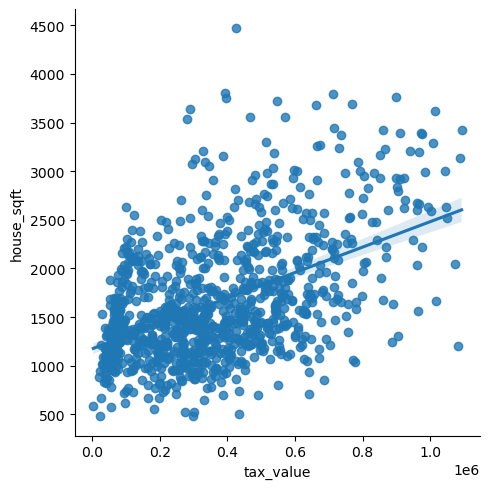

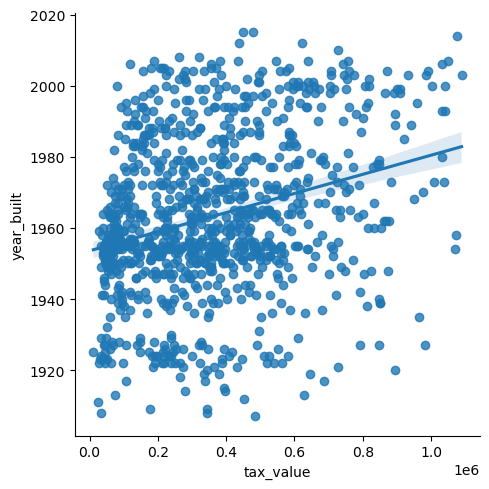

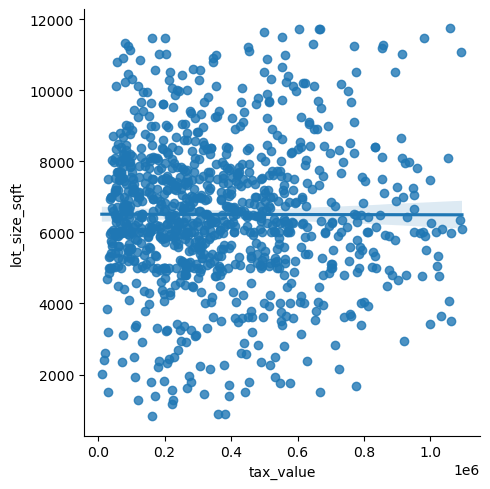

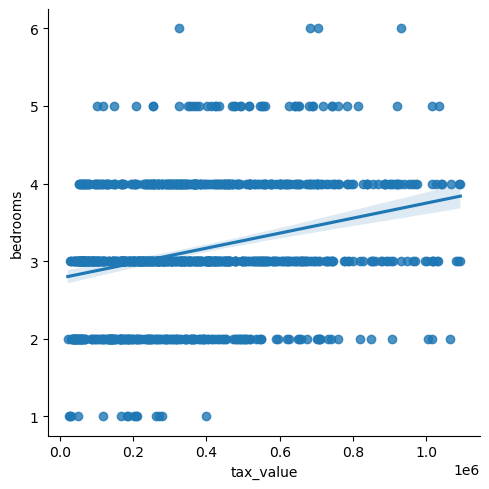

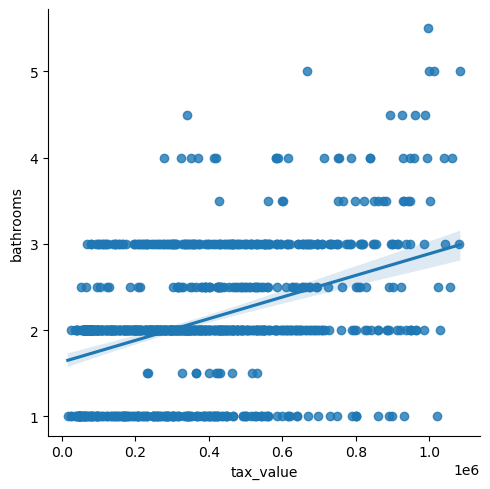

(       bedrooms  bathrooms  house_sqft  tax_value  lot_size_sqft  year_built
 31949         3        2.0        1404     176411           7704        1957
 51617         3        2.0        1456      72444           5369        1954
 42382         3        1.0        1055      64630           6550        1953
 7098          4        1.0        1351      69894           5350        1953
 43253         3        1.0        1010      57978           6365        1961
 ...         ...        ...         ...        ...            ...         ...
 38026         4        2.0        1244     281166           6017        1955
 2377          3        2.0        2040     420000           6016        1953
 46316         3        1.0        1262      50278           5781        1947
 48952         2        1.0        1466      81167           7326        1922
 44172         4        2.0        1197     261538           5892        1961
 
 [23599 rows x 6 columns],
 ['house_sqft',
  'tax_value',
  'l

In [15]:
plot_variable_pairs(train, cont_var, cat_var)

In [66]:
def plot_categorical_and_continuous_vars(train, cont_var, cat_var):
    
    # columns    
    cat_var = ['bedrooms', 'bathrooms']
    cont_var = ['house_sqft', 'tax_value', 'lot_size_sqft','year_built']

    sns.boxplot(x='bedrooms', y='tax_value', data=train.sample(1000))
    plt.show()
    sns.violinplot(x='bathrooms', y='tax_value', data=train.sample(1000))
    plt.show()

    
    return train, cont_var, cat_var

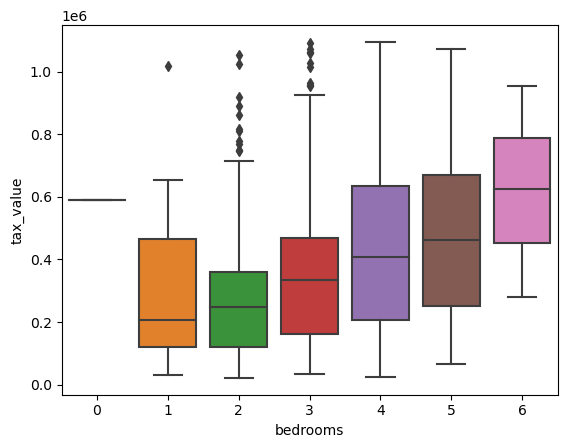

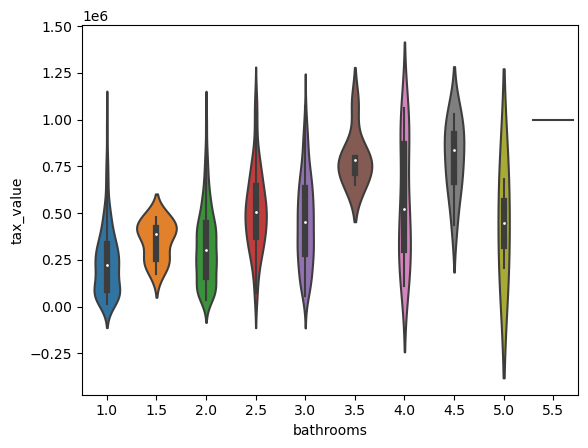

(       bedrooms  bathrooms  house_sqft  tax_value  lot_size_sqft  year_built
 31949         3        2.0        1404     176411           7704        1957
 51617         3        2.0        1456      72444           5369        1954
 42382         3        1.0        1055      64630           6550        1953
 7098          4        1.0        1351      69894           5350        1953
 43253         3        1.0        1010      57978           6365        1961
 ...         ...        ...         ...        ...            ...         ...
 38026         4        2.0        1244     281166           6017        1955
 2377          3        2.0        2040     420000           6016        1953
 46316         3        1.0        1262      50278           5781        1947
 48952         2        1.0        1466      81167           7326        1922
 44172         4        2.0        1197     261538           5892        1961
 
 [23599 rows x 6 columns],
 ['house_sqft', 'tax_value', 'lot_s

In [67]:
plot_categorical_and_continuous_vars(train, cont_var, cat_var)

In [60]:
def plot_q1(train):
    # columns    
    x = ['tax_value']
    y = ['house_sqft']
    
    sns.lmplot(x='tax_value', y='house_sqft', data=train.sample(1000), scatter=True,line_kws={'color': 'red'})
    plt.title('House SQFT Vs Tax Value')
    plt.show()

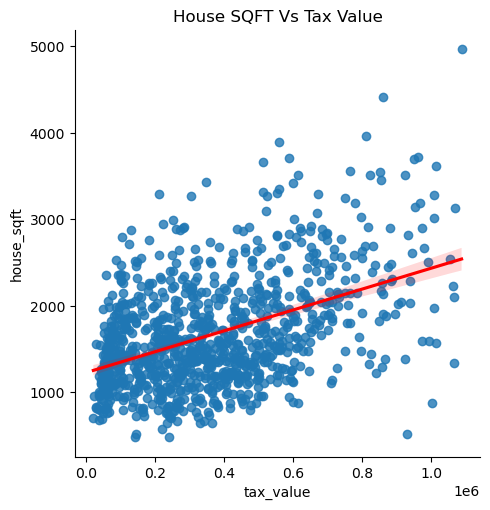

In [61]:
plot_q1(train)

In [59]:
r, p_value = pearsonr(train.house_sqft, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.4623332209166028
P-value: 0.0


In [92]:
def plot_q2(train):
    # plot 
    
    sns.violinplot(x='bathrooms', y='tax_value', data=train.sample(1000))
    plt.title('Does the number of bathrooms affect tax value?')
    plt.show()


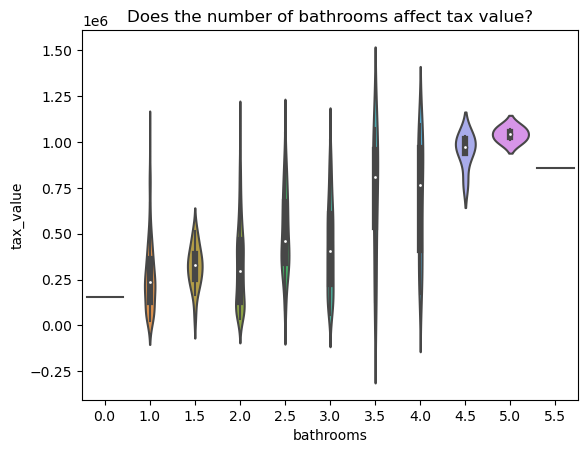

In [76]:
plot_q2(train)

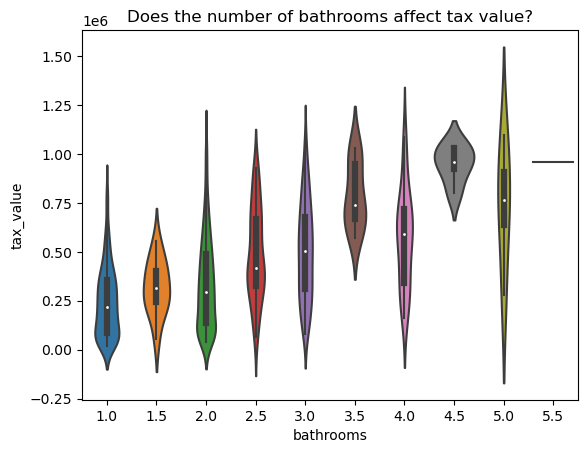

In [77]:
plot_q2(train)

In [79]:
def plot_q3(train):
    '''this function plots the scatter plot for tax value and lot size'''
    # columns    
    x = ['tax_value']
    y = ['lot_size_sqft']
    
    sns.lmplot(x='tax_value', y='house_sqft', data=train.sample(1000), scatter=True, line_kws={'color': 'red'})
    plt.title('Lot Size SQFT Vs Tax Value')
    plt.show()

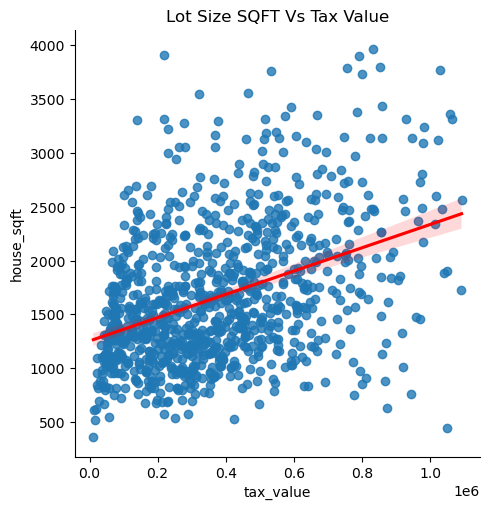

In [80]:
plot_q3(train)

In [116]:
def plot_q4(train):
    # plot 
    plt.figure(figsize = (15,5))
    sns.barplot(x='bedrooms', y='tax_value', data=train.sample(500))
    plt.title('Bedrooms vs Tax Value')
    plt.show()

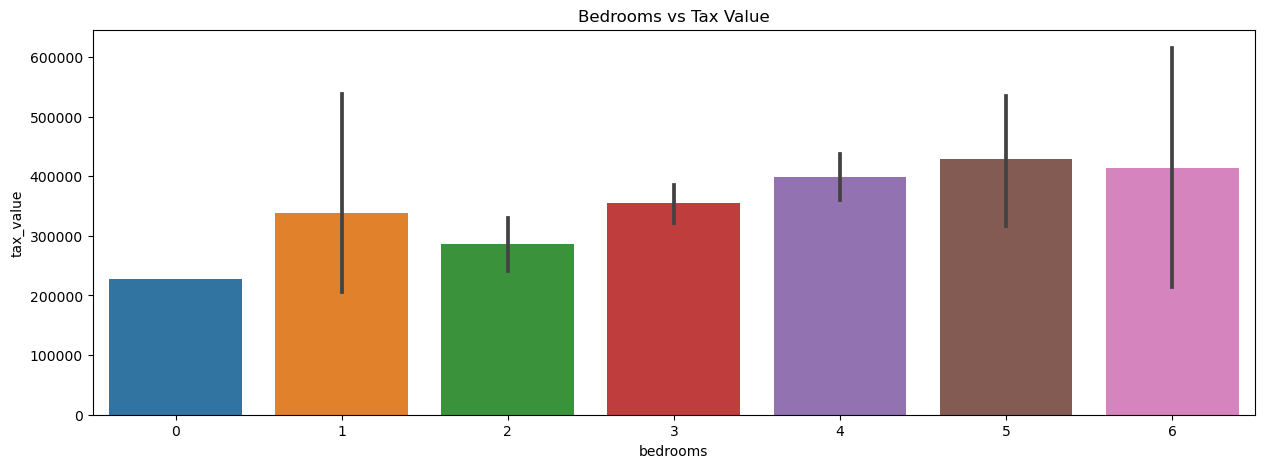

In [117]:
plot_q4(train)